# Kampus Merdeka 6: IBM & Skilvul
# Artificial Intelligence Capstone Project

## Kelompok: 32
## Anggota

*   Ana Sulistiana Alwi
*   Habibur Rohman
*   Paul Dava Nando Setya
*   Chana Amelinda Putri
*   Hilminata Saputra Sulaiman

# Problem Definition

## Topik
Klasifikasi Kaleng Minuman Cacat Menggunakan Deep Learning

## Latar Belakang
Industri manufaktur minuman menghadapi tantangan besar dalam menjaga kualitas produk, terutama dalam memastikan bahwa kaleng minuman yang diproduksi tidak cacat. Inspeksi manual memerlukan waktu dan tenaga, serta rentan terhadap kesalahan manusia. Oleh karena itu, diperlukan solusi otomatis yang dapat mendeteksi cacat pada kaleng minuman secara efisien dan akurat. Teknologi deep learning dan computer vision memberikan peluang besar untuk mengotomatisasi proses ini, meningkatkan keandalan dan efisiensi inspeksi kualitas.

## Tujuan Penelitian
Tujuan penelitian ini adalah untuk mengembangkan model deep learning yang mampu mengklasifikasikan kaleng minuman sebagai cacat atau tidak cacat berdasarkan gambar. Model ini akan diintegrasikan ke dalam aplikasi web yang memungkinkan pengguna untuk mengunggah gambar kaleng atau mengambil gambar secara real-time untuk mendeteksi cacat.

## Pertanyaan Kunci
* Bagaimana cara mengumpulkan dan memproses data gambar kaleng minuman untuk melatih model deep learning?
* Model arsitektur deep learning mana yang paling efektif untuk mendeteksi cacat pada kaleng minuman?

## Data yang Akan Dipakai
Dataset ini terdiri dari gambar kaleng minuman yang diberi label sebagai cacat atau tidak cacat. Dataset dikumpulkan dari berbagai sumber termasuk Roboflow, Google, dan gambar pribadi. Dataset dapat diakses melalui tautan berikut:
[Dataset Gambar Kaleng Minuman](https://drive.google.com/drive/folders/1bQXSU7Ivc_ZJ4j2nXGG-W2Ed2o1XHqgk?usp=sharing)

## Jenis Masalah Neural Network
Jenis masalah yang dihadapi dalam proyek ini adalah Computer Vision (CV), khususnya dalam klasifikasi gambar.

## Model
Model deep learning yang akan digunakan dalam proyek ini adalah:
* Convolutional Neural Network (CNN) - Model ini dipilih karena kinerjanya yang sangat baik dalam mengenali pola visual pada gambar.
* Transfer Learning - Menggunakan arsitektur pre-trained seperti DenseNet, ResNet, dan VGG untuk meningkatkan akurasi model dengan melatih ulang (fine-tuning) menggunakan dataset yang tersedia.


# Preparation | Persiapan

##Understanding the image/data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

# Load the Orange
image = cv2.imread('/content/drive/MyDrive/dataseti_kaleng/training/kaleng_cacat/10.jpg')

# Get the shape of the image
height, width, channels = image.shape

print("Image Shape - Height: {}, Width: {}, Channels: {}".format(height, width, channels))


Image Shape - Height: 300, Width: 300, Channels: 3


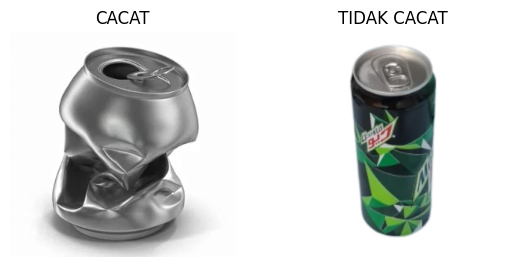

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load gambar pertama
img1 = mpimg.imread('/content/drive/MyDrive/dataseti_kaleng/training/kaleng_cacat/10.jpg')

# Load gambar kedua
img2 = mpimg.imread('/content/drive/MyDrive/dataseti_kaleng/training/kaleng_tidak_cacat/100.jpg')

# Plot gambar pertama
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')  # Menghilangkan sumbu

# Plot gambar kedua
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')  # Menghilangkan sumbu

# Tambahkan label
plt.subplot(1, 2, 1)
plt.title('CACAT')

plt.subplot(1, 2, 2)
plt.title('TIDAK CACAT')

plt.show()

## Data augmentation and preprocessing

Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


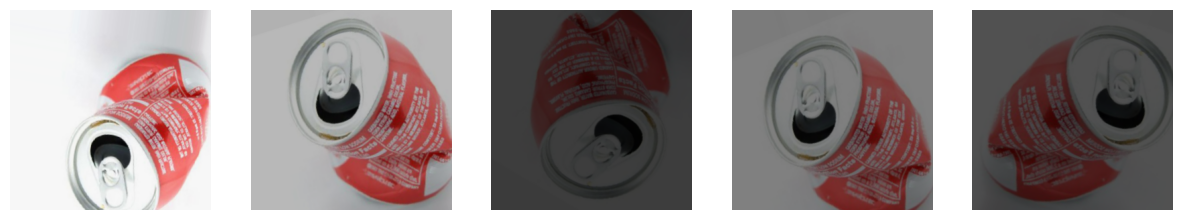

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Menambahkan flip vertikal
    brightness_range=[0.2,1.0],  # Menambahkan variasi kecerahan
    channel_shift_range=0.2,  # Menambahkan pergeseran kanal
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/MyDrive/dataset/training'
validation_dir = '/content/drive/MyDrive/dataset/validasi'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

# Visualisasi beberapa gambar hasil augmentasi
def plot_augmentation_examples(datagen, image_path):
    img = plt.imread(image_path)
    img = img.reshape((1,) + img.shape)

    fig, ax = plt.subplots(1, 5, figsize=(15, 15))
    for i, img in enumerate(datagen.flow(img, batch_size=1)):
        if i == 5:
            break
        ax[i].imshow(img[0])
        ax[i].axis('off')
    plt.show()

sample_image_path = '/content/drive/MyDrive/dataset/training/kaleng_cacat/1.jpg'
plot_augmentation_examples(train_datagen, sample_image_path)

# Model Training | Pelatihan Model

Sesuai dengan tujuan penelitian dan karakteristik data, beberapa algoritma neural network dipilih untuk dilatih dalam eksperimen ini:

## Convolutional Neural Network (CNN)

Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/20
20/20 [==============================] - 33s 1s/step - loss: 20.0204 - accuracy: 0.5478 - val_loss: 19.4141 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/20
20/20 [==============================] - 29s 1s/step - loss: 19.1251 - accuracy: 0.6083 - val_loss: 18.8069 - val_accuracy: 0.5045 - lr: 1.0000e-04
Epoch 3/20
20/20 [==============================] - 23s 1s/step - loss: 18.5270 - accuracy: 0.5987 - val_loss: 18.3003 - val_accuracy: 0.5045 - lr: 1.0000e-04
Epoch 4/20
20/20 [==============================] - 21s 1s/step - loss: 17.8464 - accuracy: 0.6385 - val_loss: 17.8771 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 5/20
20/20 [==============================] - 21s 1s/step - loss: 17.1705 - accuracy: 0.6688 - val_loss: 17.0413 - val_accuracy: 0.4911 - lr: 1.0000e-04
Epoch 6/20
20/20 [==============================] - 24s 1s/step - loss: 16.4766 - accuracy: 0.6863 - val_loss: 16.4397 - va

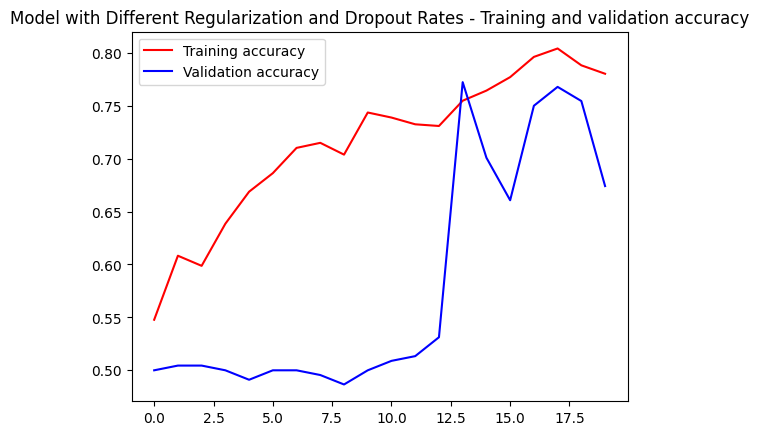

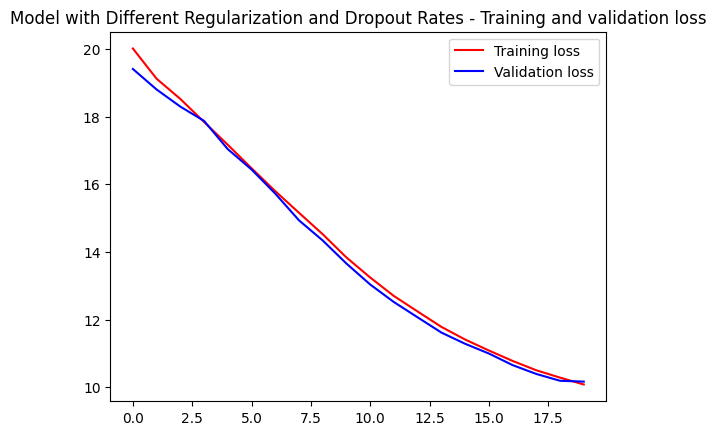

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Path ke dataset
train_dir = '/content/drive/MyDrive/dataset/training'
validation_dir = '/content/drive/MyDrive/dataset/validasi'

# Data augmentation dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

# Membangun model CNN dengan perbaikan dan variasi regularisasi
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(300, 300, 3), kernel_regularizer=l2(0.001)),  # L2 regularization pada Conv2D
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), kernel_regularizer=l2(0.001)),  # L2 regularization pada Conv2D
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), kernel_regularizer=l1(0.001)),  # L1 regularization pada Conv2D
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), kernel_regularizer=l1(0.001)),  # L1 regularization pada Conv2D
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(1024, kernel_regularizer=l2(0.001)),  # L2 regularization pada Dense
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),  # Mengubah dropout rate
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

# Definisikan callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Penggunaan LearningRateScheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Melatih model dengan modifikasi
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[model_checkpoint, reduce_lr, lr_scheduler]
)

# Mengevaluasi dan membandingkan hasil
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{title} - Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{title} - Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history, 'Model with Different Regularization and Dropout Rates')

In [ ]:
#Import Libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
#Load Data

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/training',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)
validation_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/validasi',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
type(train_data)

keras.src.preprocessing.image.DirectoryIterator

Epoch 1/10
21/21 [==============================] - 253s 12s/step - loss: 2.6138 - accuracy: 0.5197 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
21/21 [==============================] - 20s 983ms/step - loss: 0.6950 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
21/21 [==============================] - 24s 1s/step - loss: 0.6930 - accuracy: 0.5106 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
21/21 [==============================] - 20s 957ms/step - loss: 0.6938 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
21/21 [==============================] - 21s 1s/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
21/21 [==============================] - 21s 1s/step - loss: 0.6928 - accuracy: 0.5106 - val_loss: 0.6954 - val_accuracy: 0.4250
Epoch 7/10
21/21 [==============================] - 20s 973ms/step - loss: 0.6812 - accuracy: 0.5803 - val_loss: 0.7024 - val_accuracy: 0.4250
Epoch 8/1

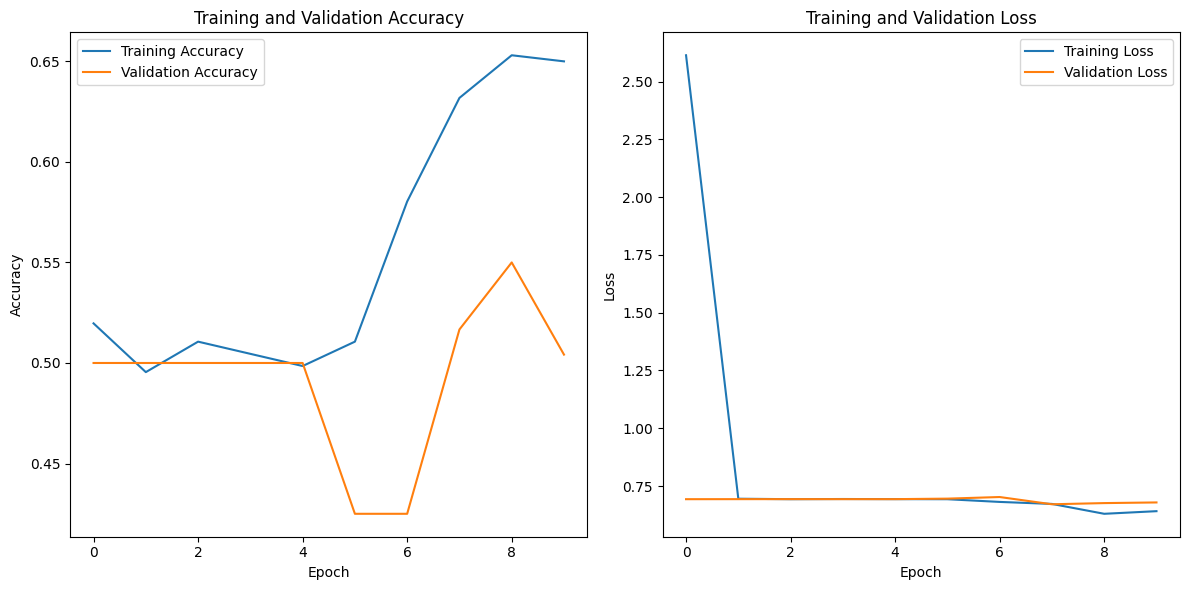

In [ ]:
#Base Line Model

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data  # Change test_data to validation_data
)

# Plotting the training and validation curves
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

#savemodel
#model.save('model1.h5')
keras.saving.save_model(model, 'model1.keras')

## Trying Model Training with Transfer Learning

### Model Pre-trained VGG16

Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/20
21/21 [==============================] - 22s 972ms/step - loss: 0.8529 - accuracy: 0.6636 - val_loss: 0.3962 - val_accuracy: 0.7750 - lr: 1.0000e-04
Epoch 2/20
21/21 [==============================] - 21s 989ms/step - loss: 0.2741 - accuracy: 0.8924 - val_loss: 0.4435 - val_accuracy: 0.7708 - lr: 1.0000e-04
Epoch 3/20
21/21 [==============================] - 23s 1s/step - loss: 0.1646 - accuracy: 0.9409 - val_loss: 0.3624 - val_accuracy: 0.8167 - lr: 1.0000e-04
Epoch 4/20
21/21 [==============================] - 20s 961ms/step - loss: 0.1274 - accuracy: 0.9515 - val_loss: 0.2442 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 5/20
21/21 [==============================] - 20s 977ms/step - loss: 0.1265 - accuracy: 0.9515 - val_loss: 0.4945 - val_accuracy: 0.7833 - lr: 1.0000e-04
Epoch 6/20
21/21 [==============================] - 20s 963ms/step - loss: 0.1010 - accuracy: 0.9667 - val_loss: 0.1932 -

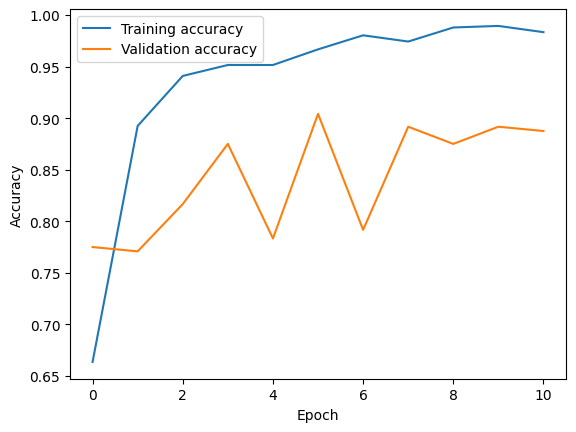

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Import VGG16 model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Import callbacks

# Memuat dan mempersiapkan data
train_data_dir = '/content/drive/MyDrive/dataset/training'
test_data_dir = '/content/drive/MyDrive/dataset/validasi'
input_shape = (300, 300, 3)

# Membuat generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan generator untuk memuat data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

# Gunakan model pre-trained VGG16 sebagai base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Buat model baru berdasarkan base model VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Melatih model dengan dataset
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluasi model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy}')

# Plot hasil pelatihan
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/14
21/21 [==============================] - 24s 1s/step - loss: 0.8078 - accuracy: 0.7045 - val_loss: 0.3326 - val_accuracy: 0.8542 - lr: 1.0000e-04
Epoch 2/14
21/21 [==============================] - 21s 965ms/step - loss: 0.2610 - accuracy: 0.8939 - val_loss: 0.2377 - val_accuracy: 0.9000 - lr: 1.0000e-04
Epoch 3/14
21/21 [==============================] - 20s 944ms/step - loss: 0.1718 - accuracy: 0.9364 - val_loss: 0.2806 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 4/14
21/21 [==============================] - 24s 1s/step - loss: 0.1305 - accuracy: 0.9545 - val_loss: 0.3701 - val_accuracy: 0.8208 - lr: 1.0000e-04
Epoch 5/14
21/21 [==============================] - 21s 1s/step - loss: 0.0942 - accuracy: 0.9636 - val_loss: 0.2026 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 6/14
21/21 [==============================] - 22s 1s/step - loss: 0.0948 - accuracy: 0.9667 - val_loss: 0.3236 - val_accu

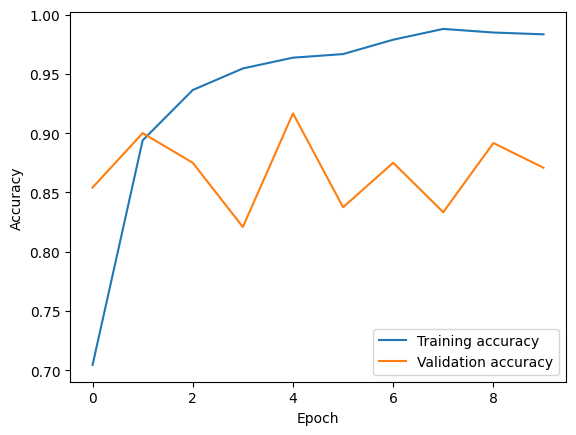

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Import VGG16 model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Import callbacks

# Memuat dan mempersiapkan data
train_data_dir = '/content/drive/MyDrive/dataset/training'
test_data_dir = '/content/drive/MyDrive/dataset/validasi'
input_shape = (300, 300, 3)

# Membuat generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan generator untuk memuat data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

# Gunakan model pre-trained VGG16 sebagai base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Buat model baru berdasarkan base model VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Melatih model dengan dataset
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=14,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluasi model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy}')

# Plot hasil pelatihan
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/24
21/21 [==============================] - 45s 2s/step - loss: 1.4164 - accuracy: 0.8000 - val_loss: 1.3588 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 2/24
21/21 [==============================] - 23s 1s/step - loss: 1.1240 - accuracy: 0.8939 - val_loss: 1.4376 - val_accuracy: 0.7042 - lr: 1.0000e-04
Epoch 3/24
21/21 [==============================] - 24s 1s/step - loss: 1.0060 - accuracy: 0.9000 - val_loss: 1.0847 - val_accuracy: 0.8292 - lr: 1.0000e-04
Epoch 4/24
21/21 [==============================] - 24s 1s/step - loss: 0.8586 - accuracy: 0.9364 - val_loss: 1.3247 - val_accuracy: 0.7542 - lr: 1.0000e-04
Epoch 5/24
21/21 [==============================] - 24s 1s/step - loss: 0.8351 - accuracy: 0.9197 - val_loss: 1.1429 - val_accuracy: 0.7833 - lr: 1.0000e-04
Epoch 6/24
21/21 [==============================] - 24s 1s/step - lo

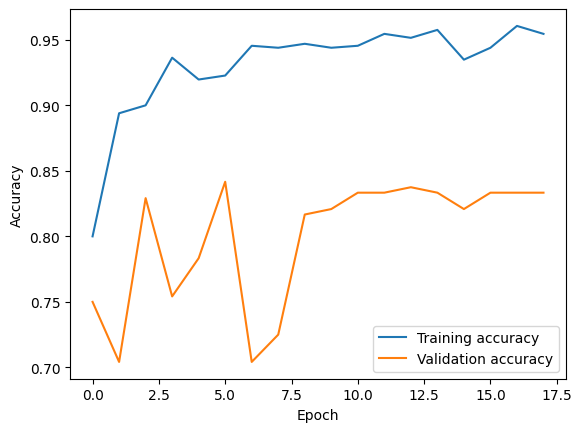

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Import VGG16 model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Import callbacks

# Memuat dan mempersiapkan data
train_data_dir = '/content/drive/MyDrive/dataset/training'
test_data_dir = '/content/drive/MyDrive/dataset/validasi'
input_shape = (300, 300, 3)

# Membuat generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Added rotation for augmentation
    width_shift_range=0.2,  # Added width shift for augmentation
    height_shift_range=0.2,  # Added height shift for augmentation
    brightness_range=[0.8, 1.2]  # Added brightness range for augmentation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan generator untuk memuat data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

# Gunakan model pre-trained VGG16 sebagai base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Buat model baru berdasarkan base model VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),  # Added BatchNormalization layer
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.00001)

# Melatih model dengan dataset
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=24,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluasi model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy}')

# Plot hasil pelatihan
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Model Pre-trained DenseNet

Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/24
21/21 [==============================] - 52s 2s/step - loss: 0.8657 - accuracy: 0.8152 - val_loss: 0.3578 - val_accuracy: 0.8833 - lr: 1.0000e-04
Epoch 2/24
21/21 [==============================] - 23s 1s/step - loss: 0.2258 - accuracy: 0.9455 - val_loss: 0.4041 - val_accuracy: 0.8708 - lr: 1.0000e-04
Epoch 3/24
21/21 [==============================] - 19s 929ms/step - loss: 0.0993 - accuracy: 0.9591 - val_loss: 0.2891 - val_accuracy: 0.9042 - lr: 1.0000e-04
Epoch 4/24
21/21 [==============================] - 22s 1s/step - loss: 0.0477 - accuracy: 0.9833 - val_loss: 0.2381 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 5/24
21/21 [==============================] - 21s 979ms/step - loss: 0.0497 - accuracy: 0.9864 - val_loss: 0.2977 - val_accuracy: 0.9083 - lr: 1.0000e-04
Epoch 6/24
21/21 [==============================] - 20s 992ms/

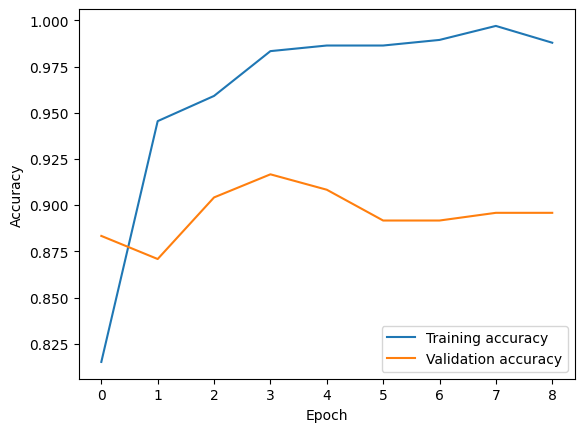

In [ ]:
#DenseNet

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121  # Import DenseNet model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Import callbacks

# Memuat dan mempersiapkan data
train_data_dir = '/content/drive/MyDrive/dataset/training'
test_data_dir = '/content/drive/MyDrive/dataset/validasi'
input_shape = (300, 300, 3)

# Membuat generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan generator untuk memuat data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

# Gunakan model pre-trained DenseNet sebagai base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Buat model baru berdasarkan base model DenseNet
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Melatih model dengan dataset
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=24,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluasi model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy}')

# Plot hasil pelatihan
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Pre-trained Resnet

Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/24
21/21 [==============================] - 33s 1s/step - loss: 3.2920 - accuracy: 0.5106 - val_loss: 1.3213 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/24
21/21 [==============================] - 21s 981ms/step - loss: 0.9666 - accuracy: 0.5439 - val_loss: 0.6739 - val_accuracy: 0.4792 - lr: 1.0000e-04
Epoch 3/24
21/21 [==============================] - 21s 1s/step - loss: 0.7019 - accuracy: 0.4985 - val_loss: 0.6696 - val_accuracy: 0.5667 - lr: 1.0000e-04
Epoch 4/24
21/21 [==============================] - 20s 954ms/step - loss: 0.6814 - accuracy: 0.5515 - val_loss: 0.6718 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 5/24
21/21 [==============================] - 20s 969ms/step - loss: 0.6911 - accuracy: 0.5742 - val_loss: 0.6706 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 6/24
21/21 [==============================] - 21s 976

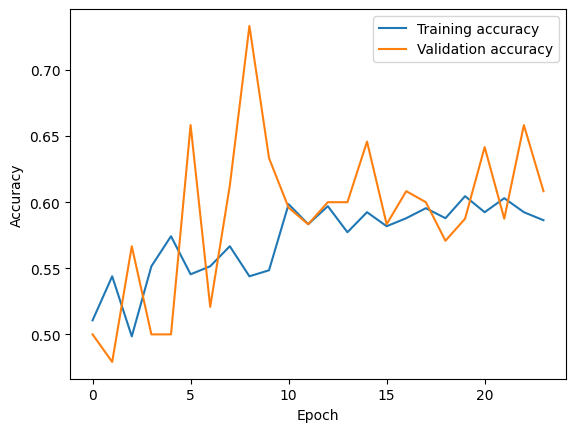

In [ ]:
#Resnet50

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50  # Import Resnet model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Import callbacks

# Memuat dan mempersiapkan data
train_data_dir = '/content/drive/MyDrive/dataset/training'
test_data_dir = '/content/drive/MyDrive/dataset/validasi'
input_shape = (300, 300, 3)

# Membuat generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan generator untuk memuat data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

# Gunakan model pre-trained Resnet sebagai base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Buat model baru berdasarkan base model Resnet
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Melatih model dengan dataset
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=24,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluasi model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy}')

# Plot hasil pelatihan
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Selection | Pemilihan Model
Berdasarkan evaulasi dari model yang diatas, kami memilih model ini karena mendapatkan nilai accuracy yang baik.

Found 660 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/24
21/21 [==============================] - 22s 969ms/step - loss: 0.5077 - accuracy: 0.7803 - val_loss: 0.3997 - val_accuracy: 0.8208 - lr: 1.0000e-04
Epoch 2/24
21/21 [==============================] - 20s 974ms/step - loss: 0.2277 - accuracy: 0.9121 - val_loss: 0.5342 - val_accuracy: 0.7750 - lr: 1.0000e-04
Epoch 3/24
21/21 [==============================] - 20s 960ms/step - loss: 0.1581 - accuracy: 0.9455 - val_loss: 0.1617 - val_accuracy: 0.9458 - lr: 1.0000e-04
Epoch 4/24
21/21 [==============================] - 20s 964ms/step - loss: 0.1349 - accuracy: 0.9409 - val_loss: 0.3564 - val_accuracy: 0.8375 - lr: 1.0000e-04
Epoch 5/24
21/21 [==============================] - 20s 946ms/step - loss: 0.1027 - accuracy: 0.9621 - val_loss: 0.2719 - val_accuracy: 0.8792 - lr: 1.0000e-04
Epoch 6/24
21/21 [==============================] - 20s 944ms/step - loss: 0.0673 - accuracy: 0.9818 - val_loss: 0.540

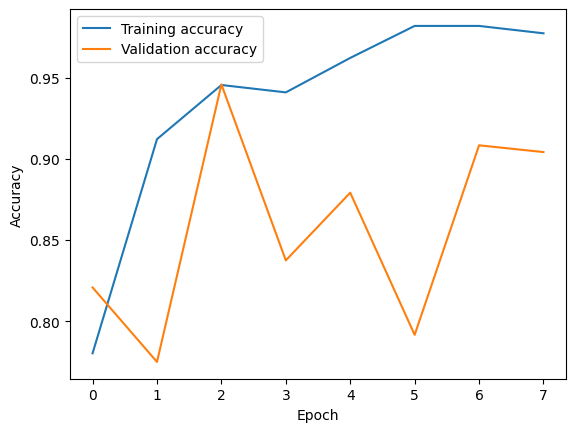

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Import VGG16 model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Import callbacks

# Memuat dan mempersiapkan data
train_data_dir = '/content/drive/MyDrive/dataset/training'
test_data_dir = '/content/drive/MyDrive/dataset/validasi'
input_shape = (300, 300, 3)

# Membuat generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan generator untuk memuat data latih dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary')

# Gunakan model pre-trained VGG16 sebagai base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Buat model baru berdasarkan base model VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Melatih model dengan dataset
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=24,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluasi model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy}')

# Plot hasil pelatihan
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#savemodel
model.save('model1.h5')